Dataset Information:
Aquaponics meta-data
The enclosed datasets are generated from freshwater aquaponics catfish ponds. The datasets are generated automatically at 5 seconds intervals using the following water quality sensors driven by the ESP 32 microcontroller: Dallas Instrument Temperature sensor (DS18B20), DF Robot Turbidity sensor, DF Robot Dissolved Oxygen sensor, DF Robot pH sensor V2.2, MQ-137 Ammonia sensor, and MQ-135 Nitrate sensor.
The project is funded by the Lacuna Award for Agriculture in Sub-Saharan Africa 2020 under the management of the Meridian Institute Colorado, USA.
The datasets and results in this section were sensor readings from June to mid-October 2021. There are 12 datasets, each from 12 aquaponics catfish ponds. Each of the 12 ponds IoT unit has six sensors (temperature, turbidity, dissolved oxygen, pH, ammonia, nitrate). As of the time of this report each unit has generated over 170,000 instances. The datasets are downloaded at intervals, cleaned, and labelled.

The attributes are:
1) Date/Time
2) Temperature
3) Turbidity
4) Dissolved Oxygen (DO)
5) pH
6) Ammonia
7) Nitrate
8) Population of fish in the pond
9)Length of Fish
10) Weight of Fish

Attribute Information:
All attributes are continuous

No statistics available, but suggest to standardise variables for certain uses (e.g. for use with classifiers that are NOT scale-invariant)

NOTE: Attributes 9 and 10 are class identifiers that can be used differently. For example, one may need to predict the length of the fish using the water quality parameters (2-7) or in addition to the population or stocking density (parameter 8). Similarly, the same can be done using the weight attribute.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_raw1= pd.read_csv("IoTPond4.csv", delimiter = ",",low_memory=False)

In [3]:
df_raw1.head(5)

,created_at,entry_id,Temperature(C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,2021-06-19 00:00:22 CET,1738.0,24.9375,81.0,7.945,8.51990,10.68908,688.0,75,6.94,3.07
1,2021-06-19 00:00:42 CET,1739.0,25.0000,81.0,6.888,8.51990,11.21030,672.0,75,6.94,3.07
2,2021-06-19 00:01:02 CET,1740.0,25.0000,81.0,33.728,8.51536,11.21030,671.0,75,6.94,3.07
3,2021-06-19 00:01:23 CET,1741.0,24.9375,81.0,10.531,8.52444,10.68908,668.0,75,6.94,3.07
4,2021-06-19 00:02:48 CET,1745.0,24.9375,81.0,11.740,8.52444,11.21030,683.0,75,6.94,3.07


Lets investigate Pond-4

In [4]:
df_raw1.columns=['created_at', 'entry_id','Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight']

In [5]:
df_raw1.describe()

,entry_id,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Weight
count,89797.000000,89797.000000,89797.000000,89797.000000,89797.000000,89742.00000,89797.000000,89844.0,89844.000000
mean,78309.205731,24.778295,96.476040,8.046123,7.734694,inf,1227.156219,75.0,70.603810
std,45617.612980,0.806160,6.304591,8.269480,0.298076,NaN,587.272120,0.0,58.409334
min,1738.000000,-127.000000,80.000000,0.007000,-0.990280,0.00001,215.000000,75.0,3.070000
25%,30876.000000,24.375000,96.000000,3.123000,7.557530,0.00026,515.000000,75.0,16.320000
50%,88141.000000,24.750000,100.000000,5.525000,7.625620,61.82086,1423.000000,75.0,58.480000
75%,114649.000000,25.125000,100.000000,9.179000,7.825360,560.16553,1760.000000,75.0,109.520000
max,155755.000000,26.625000,100.000000,41.118000,15.451660,inf,3455.000000,75.0,826.000000


There are some missing data - Ammonia 

In [6]:
df_raw1.dtypes

created_at           object
entry_id            float64
Temperature         float64
Turbidity           float64
Dissolved Oxygen    float64
PH                  float64
Ammonia             float64
Nitrate             float64
Population            int64
Fish_Length          object
Fish_Weight         float64
dtype: object

<AxesSubplot:>

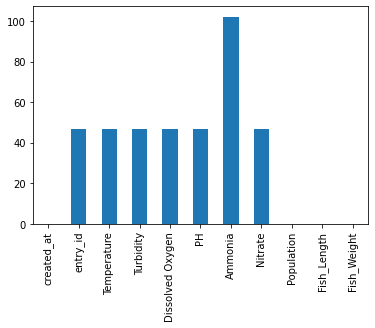

In [7]:
df_raw1.isna().sum().plot.bar()

In [8]:
df_raw1['Datetime'] = pd.to_datetime(df_raw1.created_at,infer_datetime_format=True)

/home/rupamay/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
<ipython-input-8-ddfaef0134c5>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_raw1['Datetime'] = pd.to_datetime(df_raw1.created_at,infer_datetime_format=True)


In [9]:
df_raw1.drop(columns='created_at', axis=1,inplace=True)

In [10]:
df_raw1.drop(columns='entry_id', axis=1,inplace=True)

In [11]:
df_raw1['Date'] = df_raw1['Datetime'].dt.date
df_raw1['Time'] = df_raw1['Datetime'].dt.time

In [12]:
df_raw1.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
0,24.9375,81.0,7.945,8.51990,10.68908,688.0,75,6.94,3.07,2021-06-19 00:00:22,2021-06-19,00:00:22
1,25.0000,81.0,6.888,8.51990,11.21030,672.0,75,6.94,3.07,2021-06-19 00:00:42,2021-06-19,00:00:42
2,25.0000,81.0,33.728,8.51536,11.21030,671.0,75,6.94,3.07,2021-06-19 00:01:02,2021-06-19,00:01:02
3,24.9375,81.0,10.531,8.52444,10.68908,668.0,75,6.94,3.07,2021-06-19 00:01:23,2021-06-19,00:01:23
4,24.9375,81.0,11.740,8.52444,11.21030,683.0,75,6.94,3.07,2021-06-19 00:02:48,2021-06-19,00:02:48


In [13]:
df_na = df_raw1.drop('Date', axis = 1).isna().groupby(df_raw1.Date, sort = False).sum().reset_index()

<AxesSubplot:xlabel='Date'>

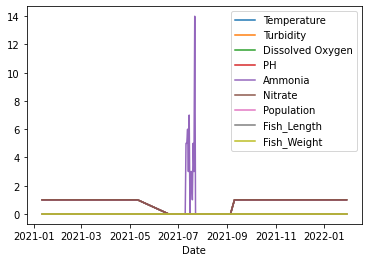

In [14]:
df_na.plot(x='Date', y=['Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight'])


Sort DataFrame by Date (Datetime)

In [15]:
df=df_raw1.sort_values(by='Datetime') 

In [16]:
df_raw1 = df_raw1.dropna()

array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>],
      dtype=object)

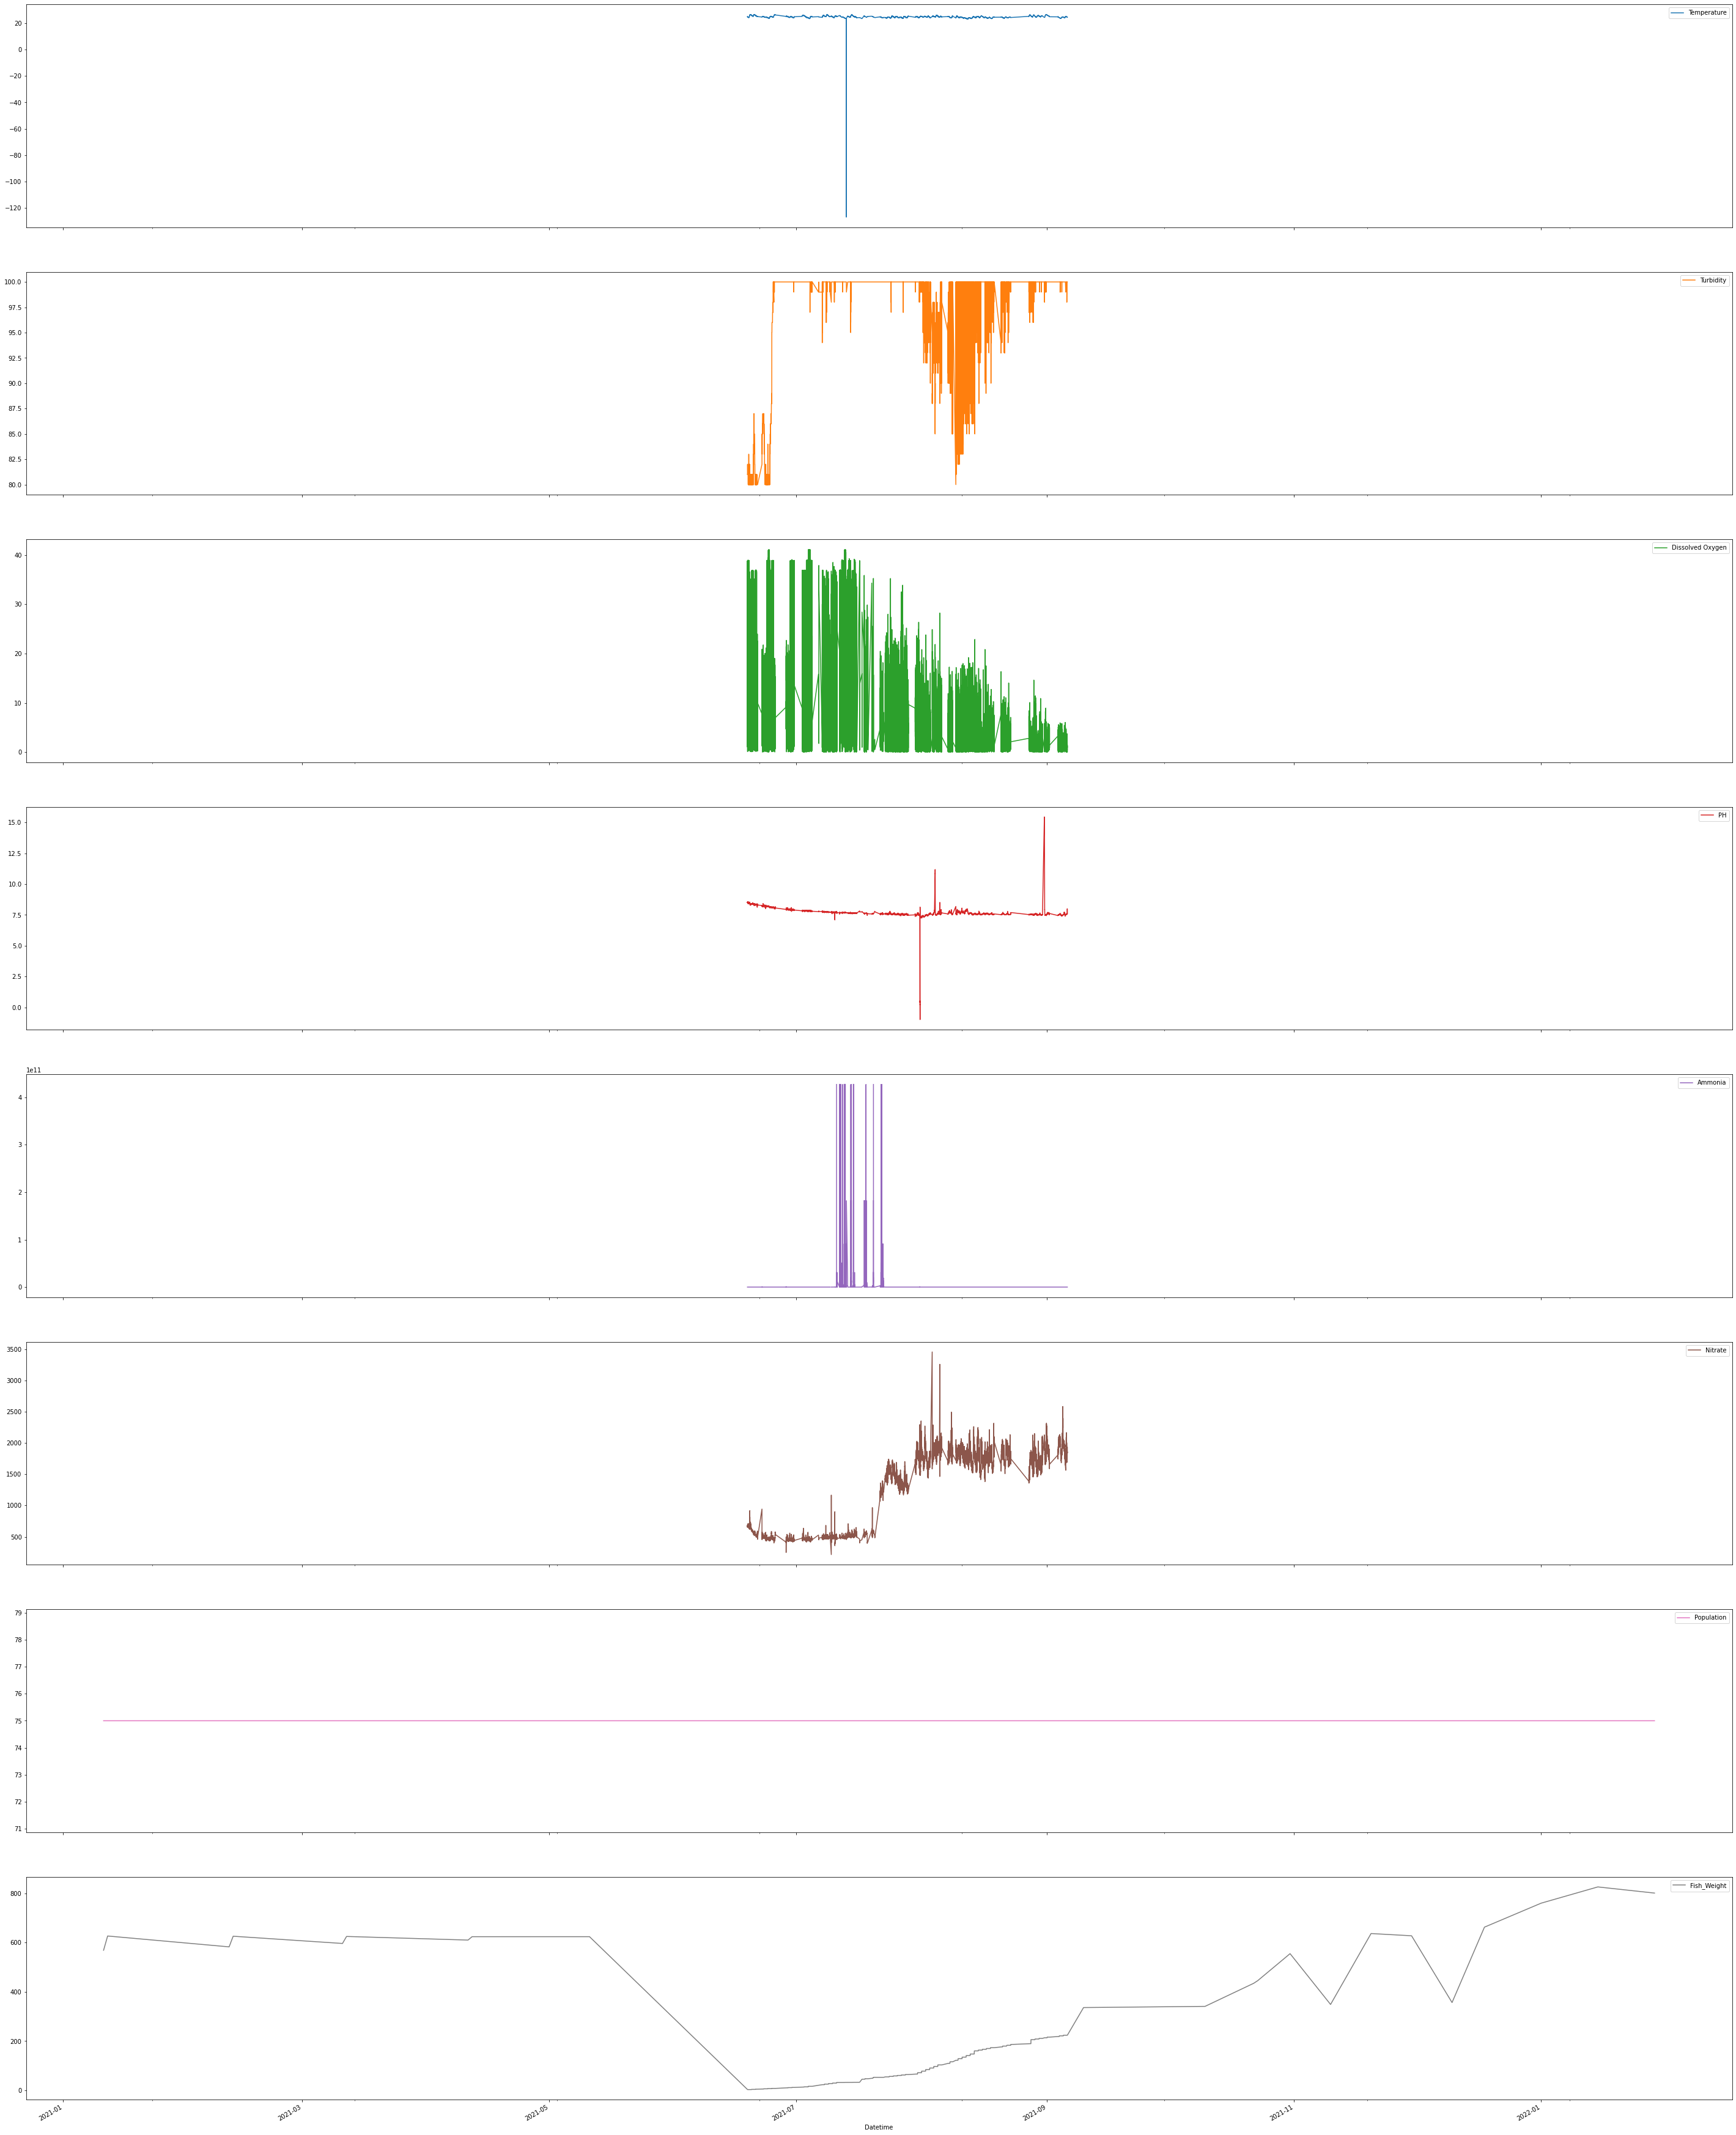

In [17]:
df.plot('Datetime',['Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight'], subplots = True, figsize = (50,70))

Data Covariance and Correlation

In [18]:
corr = df.corr()
corr

<ipython-input-18-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Weight
Temperature,1.000000,-0.205248,0.124780,0.189371,-0.002619,-0.216793,NaN,-0.193582
Turbidity,-0.205248,1.000000,-0.152568,-0.702516,0.017662,0.266219,NaN,0.304803
Dissolved Oxygen,0.124780,-0.152568,1.000000,0.282377,0.016900,-0.477066,NaN,-0.424155
PH,0.189371,-0.702516,0.282377,1.000000,-0.009863,-0.571579,NaN,-0.511542
Ammonia,-0.002619,0.017662,0.016900,-0.009863,1.000000,-0.028488,NaN,-0.017015
Nitrate,-0.216793,0.266219,-0.477066,-0.571579,-0.028488,1.000000,NaN,0.819312
Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fish_Weight,-0.193582,0.304803,-0.424155,-0.511542,-0.017015,0.819312,NaN,1.000000


<AxesSubplot:>

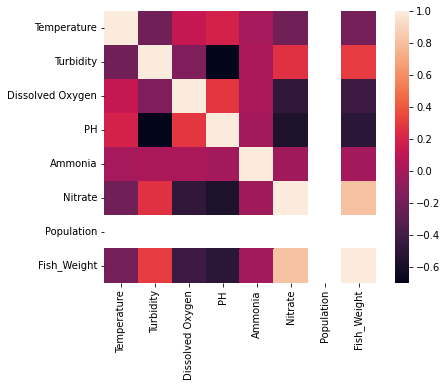

In [19]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, square=True)

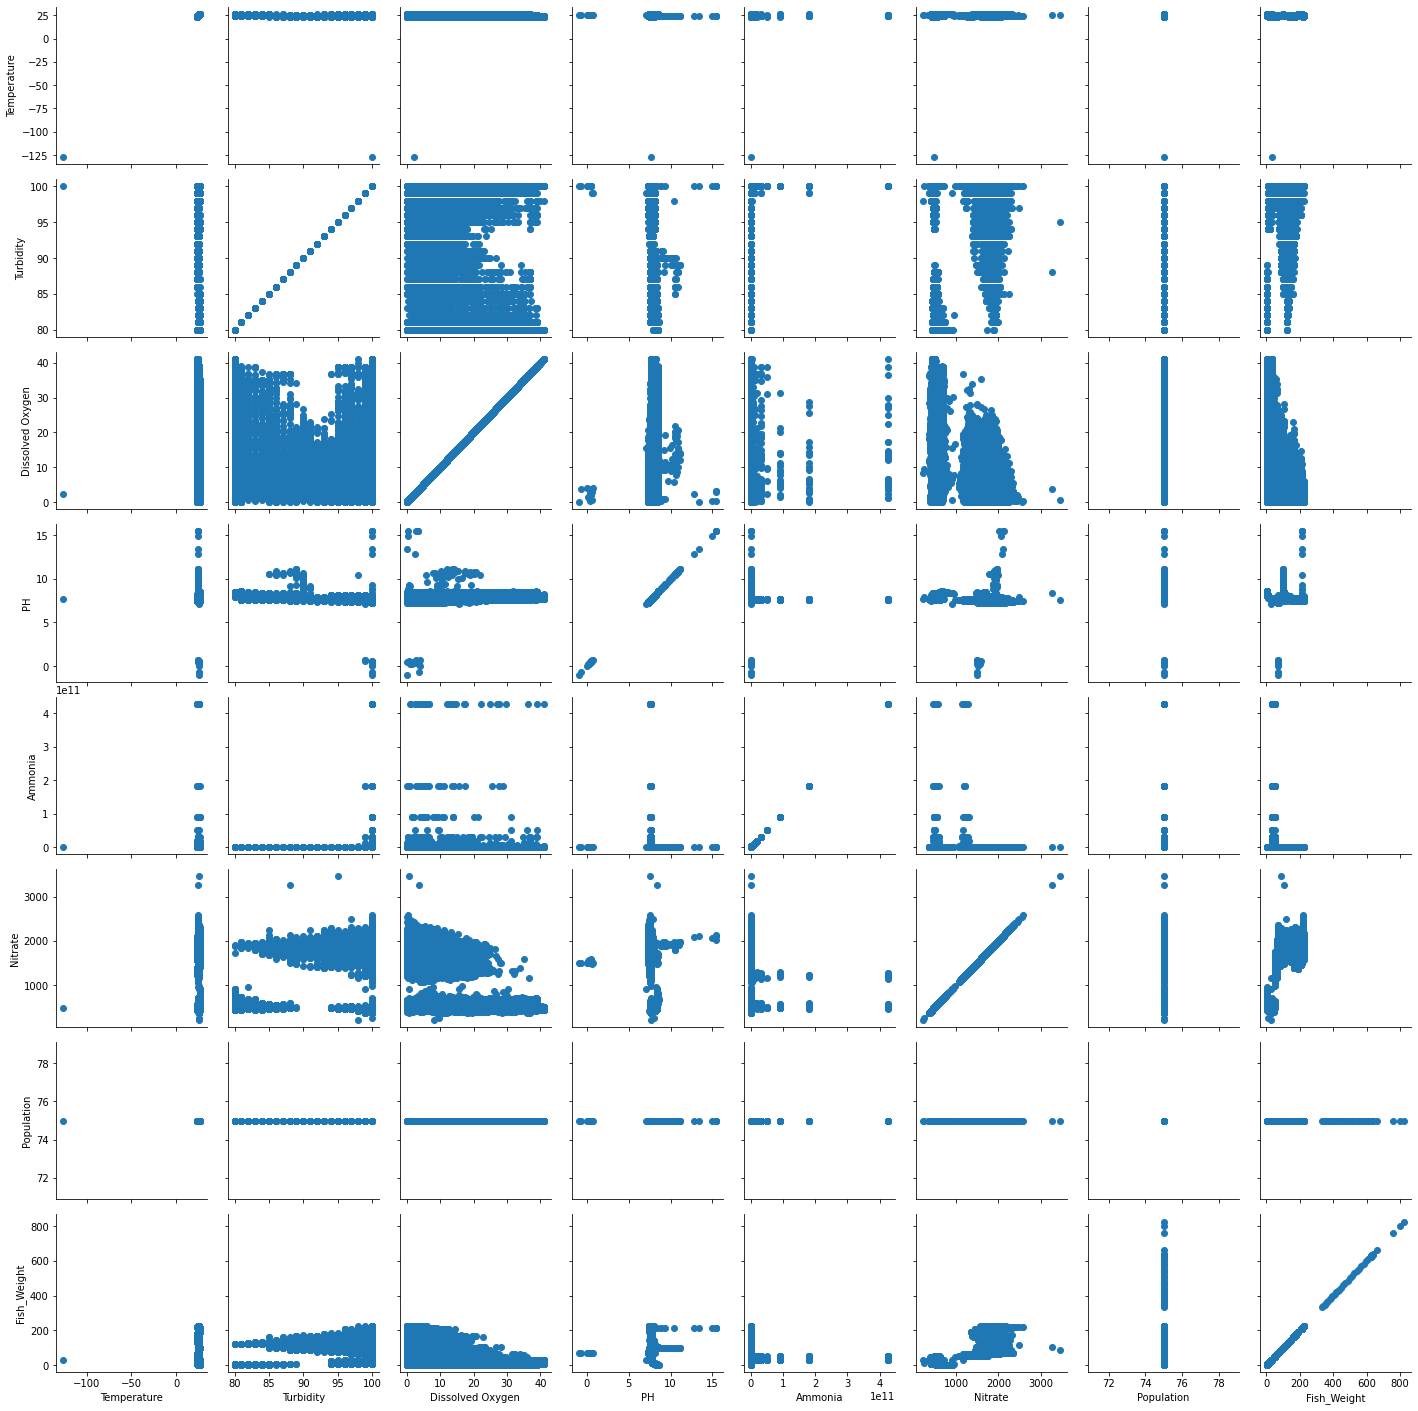

In [20]:
g = sns.PairGrid(df)
g.map(plt.scatter)

In [21]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Weight,Datetime
count,89797.0000,89797.0000,89797.0000,89797.0000,89742.0000,89797.0000,89844.0000,89844.0000,89844
mean,24.7783,96.4760,8.0461,7.7347,inf,1227.1562,75.0000,70.6038,2021-07-22 20:31:34.696952320
min,-127.0000,80.0000,0.0070,-0.9903,0.0000,215.0000,75.0000,3.0700,2021-01-11 00:00:00
25%,24.3750,96.0000,3.1230,7.5575,0.0003,515.0000,75.0000,16.3200,2021-07-04 03:17:46.249999872
50%,24.7500,100.0000,5.5250,7.6256,61.8209,1423.0000,75.0000,58.4800,2021-07-25 17:58:27.500000
75%,25.1250,100.0000,9.1790,7.8254,560.1655,1760.0000,75.0000,109.5200,2021-08-07 19:29:29.500000
max,26.6250,100.0000,41.1180,15.4517,inf,3455.0000,75.0000,826.0000,2022-01-29 00:00:00
std,0.8062,6.3046,8.2695,0.2981,nan,587.2721,0.0000,58.4093,NaN


In [22]:
len(df["Fish_Weight"].unique())

114

In [23]:
a=df["Fish_Weight"].unique()
a

array([568.82, 626.69, 582.6 , 625.78, 596.38, 624.87, 610.16, 623.9 ,
       623.94,   3.07,   3.86,   4.65,   5.44,   6.23,   7.02,   7.81,
        10.18,  10.97,  11.76,  13.34,  14.1 ,  16.32,  20.76,  22.98,
        25.2 ,  27.42,  29.42,  31.64,  31.86,  32.08,  32.3 ,  32.52,
        32.74,  45.2 ,  47.09,  48.98,  50.87,  52.76,  54.65,  56.54,
        58.48,  60.37,  62.24,  64.13,  66.02,  71.6 ,  77.92,  84.24,
        90.56,  96.88, 103.2 , 109.52, 115.82, 122.16, 128.48, 134.8 ,
       141.12, 147.44, 160.1 , 163.36, 166.62, 169.88, 173.14, 176.4 ,
       179.66, 182.92, 186.18, 189.44, 205.8 , 208.36, 210.92, 213.48,
       216.04, 218.6 , 221.16, 223.73, 336.1 , 340.9 , 364.3 , 372.1 ,
       379.9 , 387.7 , 395.5 , 403.3 , 411.1 , 418.9 , 426.7 , 434.5 ,
       445.2 , 458.88, 472.56, 486.24, 499.92, 513.7 , 527.48, 541.26,
       555.04, 348.7 , 636.7 , 635.79, 634.88, 633.97, 633.06, 632.15,
       631.24, 630.33, 629.42, 628.51, 627.6 , 356.5 , 662.6 , 760.  ,
      

In [24]:
d=df["Date"].unique()
d

array([datetime.date(2021, 1, 11), datetime.date(2021, 1, 12),
       datetime.date(2021, 2, 11), datetime.date(2021, 2, 12),
       datetime.date(2021, 3, 11), datetime.date(2021, 3, 12),
       datetime.date(2021, 4, 11), datetime.date(2021, 4, 12),
       datetime.date(2021, 5, 11), datetime.date(2021, 6, 19),
       datetime.date(2021, 6, 20), datetime.date(2021, 6, 21),
       datetime.date(2021, 6, 22), datetime.date(2021, 6, 23),
       datetime.date(2021, 6, 24), datetime.date(2021, 6, 25),
       datetime.date(2021, 6, 28), datetime.date(2021, 6, 29),
       datetime.date(2021, 6, 30), datetime.date(2021, 7, 2),
       datetime.date(2021, 7, 3), datetime.date(2021, 7, 4),
       datetime.date(2021, 7, 6), datetime.date(2021, 7, 7),
       datetime.date(2021, 7, 8), datetime.date(2021, 7, 9),
       datetime.date(2021, 7, 10), datetime.date(2021, 7, 11),
       datetime.date(2021, 7, 12), datetime.date(2021, 7, 13),
       datetime.date(2021, 7, 14), datetime.date(2021, 7, 15),

In [25]:
start=a[0]
print(d[0])
for i in range(len(a)-1):
    print(i)
    print(d[i+1],'-----------',a[i+1]-start)
    start=a[i+1]

2021-01-11
0
2021-01-12 ----------- 57.870000000000005
1
2021-02-11 ----------- -44.09000000000003
2
2021-02-12 ----------- 43.17999999999995
3
2021-03-11 ----------- -29.399999999999977
4
2021-03-12 ----------- 28.49000000000001
5
2021-04-11 ----------- -14.710000000000036
6
2021-04-12 ----------- 13.740000000000009
7
2021-05-11 ----------- 0.04000000000007731
8
2021-06-19 ----------- -620.87
9
2021-06-20 ----------- 0.79
10
2021-06-21 ----------- 0.7900000000000005
11
2021-06-22 ----------- 0.79
12
2021-06-23 ----------- 0.79
13
2021-06-24 ----------- 0.7899999999999991
14
2021-06-25 ----------- 0.79
15
2021-06-28 ----------- 2.37
16
2021-06-29 ----------- 0.7900000000000009
17
2021-06-30 ----------- 0.7899999999999991
18
2021-07-02 ----------- 1.58
19
2021-07-03 ----------- 0.7599999999999998
20
2021-07-04 ----------- 2.2200000000000006
21
2021-07-06 ----------- 4.440000000000001
22
2021-07-07 ----------- 2.219999999999999
23
2021-07-08 ----------- 2.219999999999999
24
2021-07-09 --

In [26]:
len(df["Date"].unique())

115

In [27]:
f=df[df["Date"]==d[6]]

#use datetime_is_numeric = True to get statistics on the datetime column
desc = f.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Weight,Datetime
count,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1
mean,nan,nan,nan,nan,nan,nan,75.0000,610.1600,2021-04-11 00:00:00
min,nan,nan,nan,nan,nan,nan,75.0000,610.1600,2021-04-11 00:00:00
25%,nan,nan,nan,nan,nan,nan,75.0000,610.1600,2021-04-11 00:00:00
50%,nan,nan,nan,nan,nan,nan,75.0000,610.1600,2021-04-11 00:00:00
75%,nan,nan,nan,nan,nan,nan,75.0000,610.1600,2021-04-11 00:00:00
max,nan,nan,nan,nan,nan,nan,75.0000,610.1600,2021-04-11 00:00:00
std,nan,nan,nan,nan,nan,nan,nan,nan,NaN


array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>],
      dtype=object)

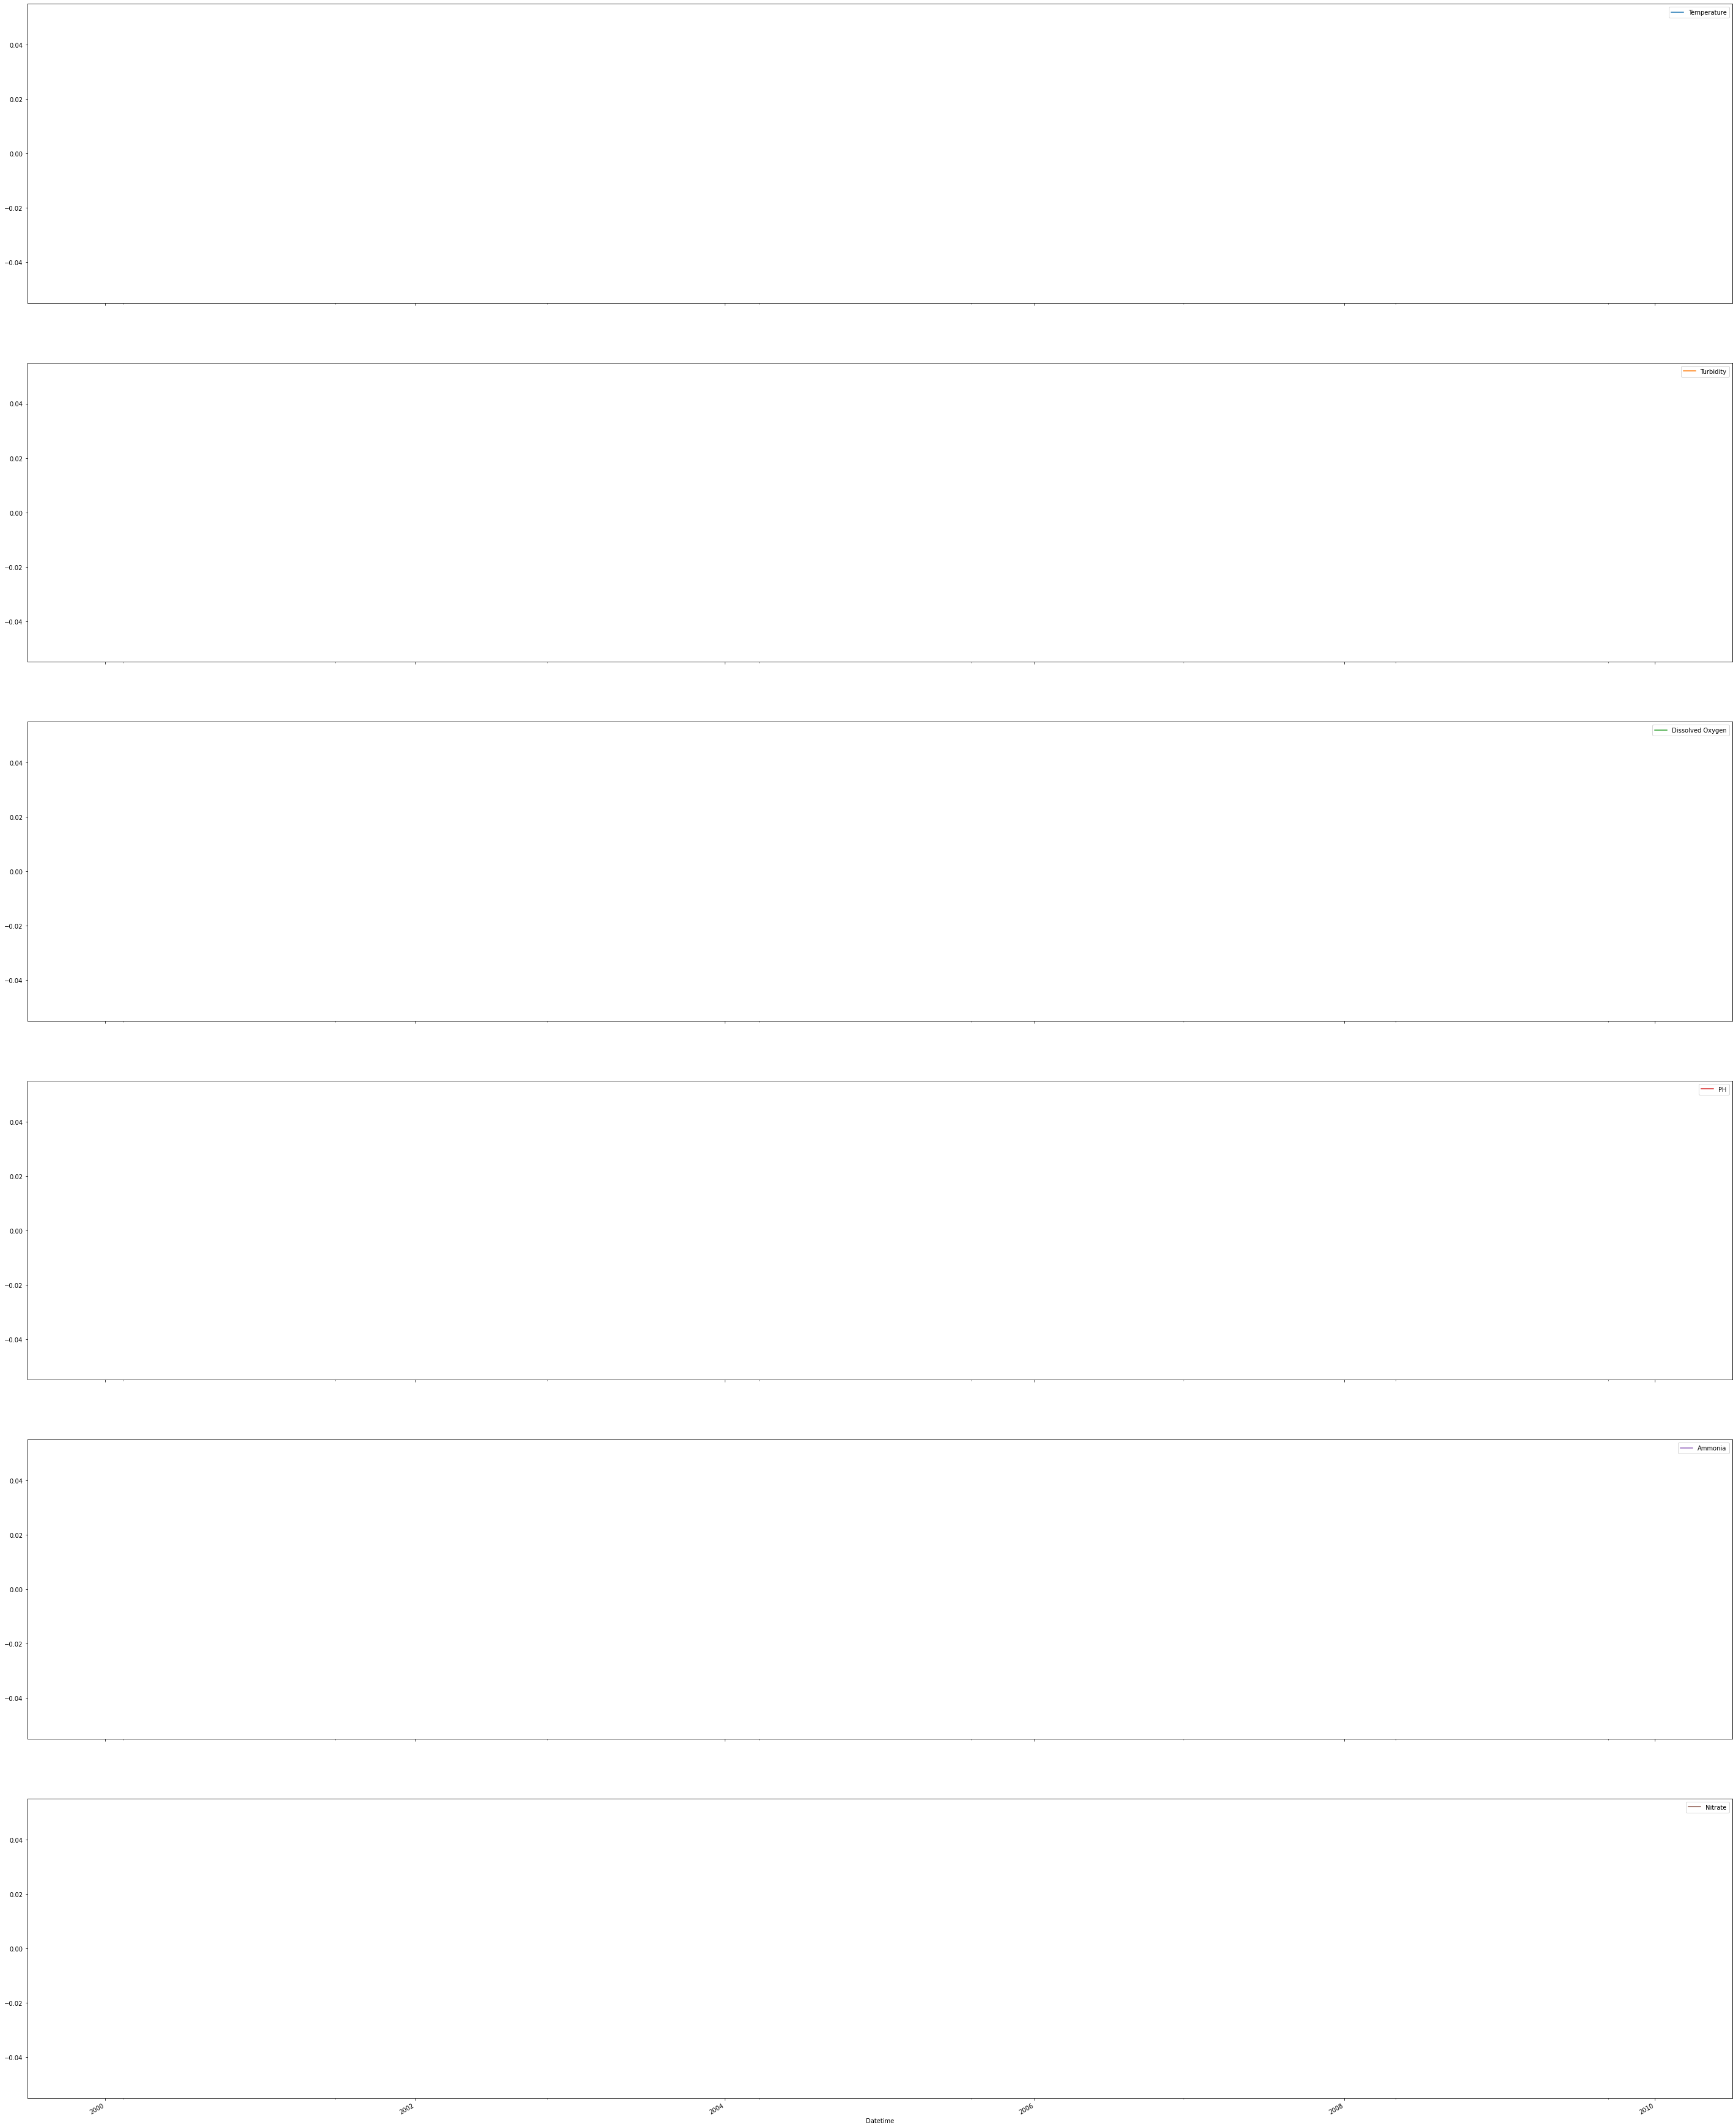

In [28]:
f.plot('Datetime',['Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate'], subplots = True, figsize = (50,70))

Find outliers and view the data distribution using a histogram

Using a histogram, we can see how the data is distributed. Having data that follows a normal distribution is necessary for some of the statistical techniques used to detect outliers. If the data doesn’t follow a normal distribution, the z-score calculation shouldn’t be used to find the outliers. 

<AxesSubplot:xlabel='Temperature'>

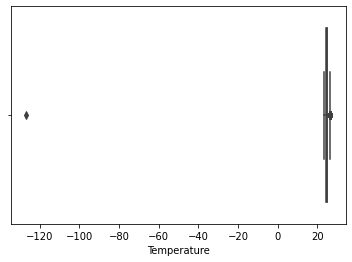

In [29]:
sns.boxplot(x=df['Temperature'])

<AxesSubplot:xlabel='Turbidity'>

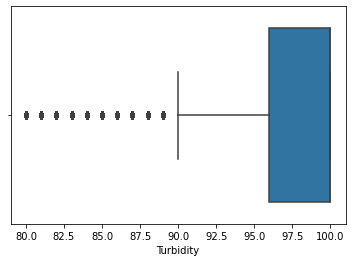

In [30]:
sns.boxplot(x=df['Turbidity'])

<AxesSubplot:xlabel='Dissolved Oxygen'>

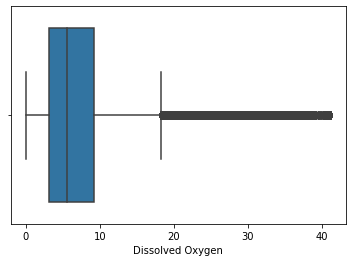

In [31]:
sns.boxplot(x=df['Dissolved Oxygen'])

<AxesSubplot:xlabel='PH'>

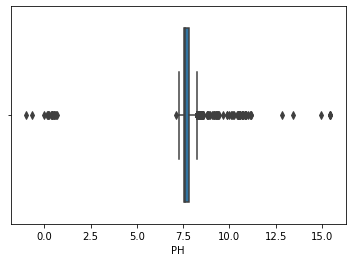

In [32]:
sns.boxplot(x=df['PH'])

<AxesSubplot:xlabel='Ammonia'>

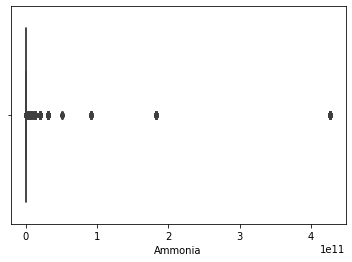

In [33]:
sns.boxplot(x=df['Ammonia'])

<AxesSubplot:xlabel='Nitrate'>

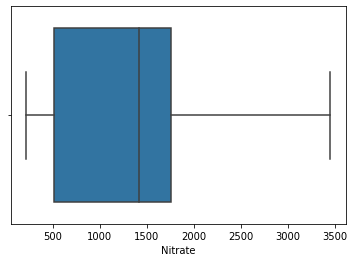

In [34]:
sns.boxplot(x=df['Nitrate'])

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

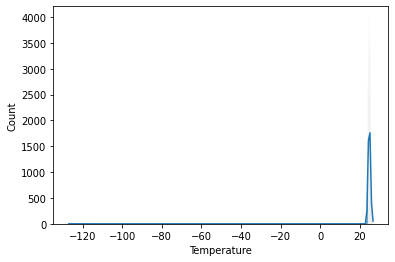

In [35]:
sns.histplot(df['Temperature'], kde=True)

<AxesSubplot:xlabel='Turbidity', ylabel='Count'>

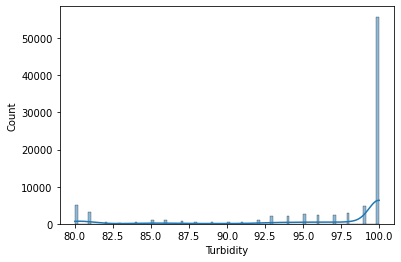

In [36]:
sns.histplot(df['Turbidity'], kde=True)

<AxesSubplot:xlabel='Dissolved Oxygen', ylabel='Count'>

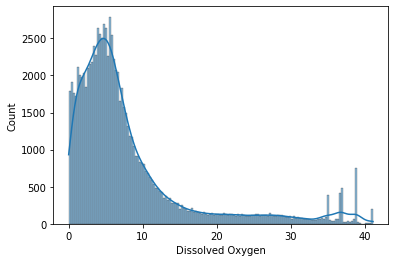

In [37]:
sns.histplot(df['Dissolved Oxygen'], kde=True)

<AxesSubplot:xlabel='PH', ylabel='Count'>

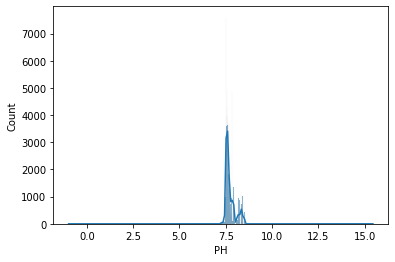

In [38]:
sns.histplot(df['PH'], kde=True)

<AxesSubplot:xlabel='Nitrate', ylabel='Count'>

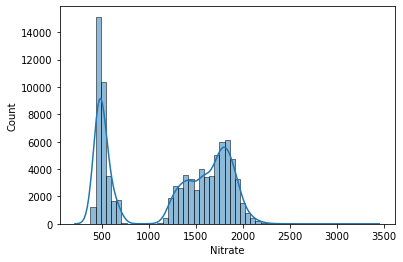

In [39]:
sns.histplot(df['Nitrate'], kde=True)